# COGS 118A - Final Project
TODO Insert title here
**THE SOCCER FIFA MARKET PREDICTION NOTEBOOK**


In [1]:
import sys

In [2]:
import re
_r = re.escape
def _re_replace(s : str, to_replace : dict):
    for p, r in to_replace.items():
        s = re.compile(p).sub(r, s)
    return s

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [4]:
!{sys.executable} -m pip install --quiet pandas
import pandas as pd

In [5]:
!{sys.executable} -m pip install --quiet seaborn
import seaborn as sns

In [6]:
# OLS using statsmodels
!{sys.executable} -m pip install --quiet statsmodels numpy
import statsmodels.api as sm
import numpy as np

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [7]:
!{sys.executable} -m pip install --quiet sklearn
import sklearn as skl

import sklearn.linear_model

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold


## Group members

- Khalid Ade
- Pablo Moreno
- Sujay Srinivasan
- Daniel Vega Lojo
- Jared Chen

## Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

----

Association Football (or soccer) is a worldwide sport played by over 250 million players in over 250 countries<sup><a name="note-assoc-football" href="#assoc-football">[1]</a></sup>.  In fact, football is the world’s sport, and the most popular across the globe in terms of fans as well. Football has a huge transfer market in which players are transferred across teams for up to hundreds of millions of euros. To put the amount of money that circulates in the global football market into perspective, squad values of top teams like Manchester United surpass billions of euros<sup><a name="note-transfermarkt-value-how" href="#transfermarkt-value-how">[2]</a></sup>. The market value of a player accounts for a huge role in how teams conduct their business in regards to transfers. Our goal is to help these clubs make the right investments in players they want to obtain, especially when spending huge amounts of money. More specifically, we want to accurately predict the market value of players so that clubs aren’t overpaying, or underselling their valued players. Plenty of factors play a role in determining the market value of a player. The most important factors include age, performance for club and national team (measured in stats such as goals, assists, tackles etc.) for a player in that position, experience(measured by number of seasons in top leagues), marketing value (measured by social media presence), and injury vulnerability<sup><a name="note-transfermarkt-value-how" href="#transfermarkt-value-how">[2]</a></sup>. 

## Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

----

The global football transfer market involves the circulation of billions of euros. Many top European clubs have spent hundreds of millions of dollars to bolster their respective teams. For example teams like Manchester United, Manchester City, and PSG have spent almost billions of euros to sign players to help their teams’ success in their respective leagues and on the European stage<sup><a name="note-man-utd" href="#man-utd">[6]</a></sup>. There is no doubt that decisions involving huge sums of such money should be carefully analyzed so that clubs can maximize success in both the business side as well as the performance side of their respective clubs. Transfermarkt is an online platform for transfers, market values, rumors, and stats. The business model consists of, in addition to sports journalistic reporting, the profiles of the players and discussion forums on the performance and market values of individual soccer players, teams and leagues<sup><a name="note-ackermann-follert-etal" href="#ackermann-follert-etal">[4]</a></sup>. Frequently being discussed in sports science and sports economics literature over the past few years, the so-called "market values" („Marktwerte“) have s to become the center of media attentioMultipleous studies have shown positive correlations between the predicted market values on Transfermarkt and the actual player income.’It’s reportedly known that players who are in contract negotiations would sometimes refer to Transfermarkt values as baselines for their salary expectations<sup><a name="note-ackermann-follert-etal" href="#ackermann-follert-etal">[4]</a></su>.  The “market values” can also be used as a measure of marketability; a higher marketability helps a player secure partnerships through sponsorship contracts. The age and performance statistics on Transfermarkt are also particularly useful in that player observers can identify young players and predict the development opportunities<sup><a name="note-ackermann-follert-etal" href="#ackermann-follert-etal">[4]</a></sup>. 

The open forums of Transfermarkt allow users to discuss and predict individual players’ market values and performance. Previous studies on collective intelligence<sup><a name="note-transfermarkt-value-how" href="#transfermarkt-value-how">[2]</a></sup> have used OLS regression models to evaluate the accuracy of predictions. It is shown that “forecasts of international soccer results based on the crowd’s valuations are more accurate than those based on standard predictors.”<sup><a name="note-peeters" href="#peeters">[3]</a></sup> This reveals a potential possibility that distributed intelligence is a contributing factor to the accuracy of predictions. We want to know if supervised machine learning algorithms, as another form of distributed intelligence, can make accurate predictions just as humans do. More particularly, we want to use machine learning models like OLS to predict market value of players across the football world. 

## Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

----

Given the considerable number of players in football across the globe, it can get tedious to know which players have potential and are worth investing in. Do they have high performance for a player in their position? Are they playing for a renowned club or in a renowned league? Is their behavior respectable and are they marketable? These are the kinds of questions top clubs use when considering paying the big bucks for players. The problem we are trying to tackle is predicting the market value of players (in euros) using stats that are important when investing in a player such as goals, assists, and marketability.

## Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!

----

The dataset<sup><a name="note-cariboo" href="#cariboo">[7]</a></sup> is composed of 7 different subsets, we will be using 4 of the datasets. Since each feature resides in different sets. 

- `Appearances.csv`
    - Player ID, Game ID, Appearance ID, Competition ID, Player club ID, Assist, Minutes Played, Yellow cards, Red Cards
- `Clubs.csv `
    - Club ID, Name, Pretty_name, Domestic_competition_id, Total_market_value, Squad_size, Average_age, Foreigners_numbers, Foreigners_percentage, National_team_players, Stadium_name, Stadium_seats, Net_transfer_record, Coach_name, URL
- `Competitions.csv`
    - Competition_id, Name, type, country_id, country_name, domestic_league_code, confederation, URL.  
- `Games.csv` 
    - Game_id, Competition_code, Season, Round, Date, Home_club_id, Away_club_id, Home_club_goals, away_club_goals, Home_club_postions, Away_club_postion, Stadium, Attendance, Referee, URL 
- `Leagues.csv` 
    - League_id, name, Confederation
- `Player_valuations.csv` 
    - Player_id, Date, Market_value
- `Players.csv`
    - Player_id, Last_season, Current_club_id, Name, Pretty_name, country_of_birth, Country_of_citizenship, Date_of_birth, Position, Sub_position, Foot, Height_in_cm, Market_value_in_gbp, Highest_market_value_in_gbp, URL

- _What an observation consists of_: We are trying to use the variables we assume to be the most important and independent from each other. We decided on 
    - Club, Nationality, League, Appearances, Minutes, Goals, Assist, Age, Conduct, Media Presence, Years Played, Trophies, Experience, Position, Physicality, Potential. 
- _What some critical variables are, how they are represented_: We want variables which have the highest co-variance with each other. The metric should handle most features as unique features. 
- _Any special handling, transformations, cleaning, etc will be needed_: There will be club names, and probably inferences in our data. Such as Media Presence or Potential, these are metrics which can be objective to the person. How popular is the player that we are analyzing? 

We are still going to be in search of more databases that might have different descriptive data that we might like to see how organizations search for talent. We can use what they might describe as their most sought out characteristics. 

For Simplicity we can also assume that all players have no contracts for their evaluation and are based solely on performance and the other variables mentioned.

In [8]:
_data_ = {
    name: pd.read_csv(
        file, 
        engine = 'c',
        low_memory = True,
        memory_map = False, # set `False` to load into memory
        **kwargs
    ) for name, file, kwargs in [
        ('appearances', 'data/appearances.csv', {
            'dtype': {
                'player_id': 'object',
                'game_id': 'object',
                'appearance_id': 'object',
                'competition_id': 'object',
                'player_club_id': 'object'
            }
        }),
        ('clubs', 'data/clubs.csv', {
            'dtype': {
                'club_id': 'object'
            }
        }),
        #('competitions', 'data/competitions.csv', {}),
        ('games', 'data/games.csv', {
            'dtype': {
                'game_id': 'object'
            }
        }),
        #('leagues', 'data/leagues.csv', {}),
        ('players', 'data/players.csv', {
            'parse_dates': ['date_of_birth'],
            'dtype': {
                'player_id': 'object',
                'country_of_birth': 'category',
                'country_of_citizenship': 'category',
                'position': 'category',
                'sub_position': 'category'
            }
        }),
        ('player_valuations', 'data/player_valuations.csv', {
            'parse_dates': ['date'],
            'dtype': {
                'player_id': 'object'
            }
        })
    ]
}

In [9]:
data = {}

In [10]:
# clubs
data['clubs'] = _data_['clubs'].copy()

data['clubs'] = data['clubs'][[
    'club_id', 
    'pretty_name'
]]
data['clubs'].rename(
    columns = {'pretty_name': 'club_name'},
    inplace = True
)
data['clubs'].set_index('club_id', inplace = True)

data['clubs']

,club_name
club_id,
1032,Fc Reading
2323,Orduspor
1387,Acn Siena 1904
3592,Kryvbas Kryvyi Rig
1071,Wigan Athletic
...,...
1269,Pec Zwolle
200,Fc Utrecht
317,Fc Twente Enschede


In [11]:
# games
data['games'] = _data_['games'].copy()

data['games'] = data['games'][[
    'season', 
    'game_id'
]]
data['games'].set_index('game_id', inplace = True)

data['games']

,season
game_id,
2244388,2012
2219794,2011
2244389,2012
2271112,2012
2229332,2012
...,...
3646190,2021
3646188,2021
3655616,2021


In [12]:
# appearances
data['appearances'] = _data_['appearances'].copy()

data['appearances'] = data['appearances'].loc[
    :, ~data['appearances'].columns.isin([
        'appearance_id', 
        'competition_id'
    ])
]
data['appearances'].rename(
    columns = {'player_club_id': 'club_id'},
    inplace = True
)

data['appearances'] = (
    data['appearances']
        .merge(
            data['games'], 
            on = 'game_id',
            copy = False
        ).drop(columns = 'game_id')
        .merge(
            data['clubs'], 
            on = 'club_id',
            copy = False
        ).drop(columns = 'club_id')
)

data['appearances'] = (
    data['appearances']
        .groupby(['player_id', 'season'])
        .agg({
            **{
                c: 'sum' for c in [
                    'goals', 
                    'assists', 
                    'minutes_played', 
                    'yellow_cards', 
                    'red_cards'
                ]
            },
            'club_name': 'last'
        })
        .reset_index('season')
)

data['appearances']

,season,goals,assists,minutes_played,yellow_cards,red_cards,club_name
player_id,,,,,,,
10,2014,32,18,4578,12,0,Lazio Rom
10,2015,16,14,3428,6,0,Lazio Rom
100009,2014,0,0,5576,8,0,Kuban Krasnodar
100009,2015,2,2,4512,12,0,Kuban Krasnodar
100009,2016,0,0,1260,6,0,Anzhi Makhachkala
...,...,...,...,...,...,...,...
99923,2014,0,2,832,4,0,Cagliari Calcio
99924,2016,0,2,1824,6,0,Ca Osasuna
99977,2014,0,0,194,0,0,Rcd Mallorca


In [13]:
# player valuations
data['player_valuations'] = _data_['player_valuations'].copy()

data['player_valuations']['season'] = (
    pd.DatetimeIndex(data['player_valuations']['date']).year
)
data['player_valuations'].drop(columns = 'date', inplace = True)

data['player_valuations'] = (
    data['player_valuations']
        .groupby(['player_id', 'season'])
        .agg({'market_value': 'mean'})
        .reset_index('season')
)
data['player_valuations'].rename(
    columns = {'market_value_in_gbp': 'market_value'},
    inplace = True
)

data['player_valuations']

,season,market_value
player_id,,
10,2004,6300000.0
10,2005,10800000.0
10,2006,22500000.0
10,2007,20700000.0
10,2008,18000000.0
...,...,...
99977,2018,990000.0
99977,2019,720000.0
99977,2020,562500.0


In [14]:
# players
data['players'] = _data_['players'].copy()

data['players'] = data['players'].loc[
    :, ~data['players'].columns.isin([
        'last_season',
        'name',
        'current_club_id',
        'market_value_in_gbp',
        'highest_market_value_in_gbp',
        'country_of_birth',
        'url', 
        'foot'
    ])
]
data['players'].rename(
    columns = {
        'pretty_name': 'name',
        'height_in_cm': 'height',
        'country_of_citizenship': 'nationality'
    },
    inplace = True
)

data['players']['sub_position'] = (
    data['players']['sub_position'].cat
        .rename_categories(
            lambda s: (
                _re_replace(s, {
                    fr'''^(.*){_r(' - ')}(.*)$''': r'\2'
                })
                .title()
            )
        )
)

data['players'].set_index('player_id', inplace = True)

data['players']

,name,nationality,date_of_birth,position,sub_position,height
player_id,,,,,,
254016,Arthur Delalande,France,1992-05-18,Midfield,Central Midfield,186
51053,Daniel Davari,Iran,1988-01-06,Goalkeeper,Goalkeeper,192
31451,Torsten Oehrl,Germany,1986-01-07,Attack,Centre-Forward,192
44622,Vladimir Kisenkov,Russia,1981-10-08,Defender,Right-Back,182
30802,Oscar Diaz,Spain,1984-04-24,Attack,Centre-Forward,183
...,...,...,...,...,...,...
462285,Fabian De Keijzer,Netherlands,2000-05-10,Goalkeeper,Goalkeeper,193
368612,Merveille Bokadi,DR Congo,1996-05-21,Defender,Centre-Back,186
408574,Joey Veerman,Netherlands,1998-11-19,Midfield,Central Midfield,185


In [15]:
# final dataset
data['all'] = data['players'].merge(
    data['player_valuations'].merge(
        data['appearances'], 
        on = ['player_id', 'season'],
        copy = False
    ), 
    on = 'player_id',
    copy = False
)

data['all']['age'] = (
    pd.to_datetime(data['all']['season'], format = '%Y', utc = True) 
        - pd.to_datetime(data['all']['date_of_birth'], utc = True)
).astype('timedelta64[Y]')
data['all'].drop(columns = 'date_of_birth', inplace = True)

data['all'].dropna(axis = 'index', inplace = True)

data['all']

,name,nationality,position,sub_position,height,season,market_value,goals,assists,minutes_played,yellow_cards,red_cards,club_name,age
player_id,,,,,,,,,,,,,,
9800,Artem Milevskyi,Ukraine,Attack,Centre-Forward,189,2020,90000.0,0,0,720,6,0,Fk Minaj,34.0
43084,Gaetano Berardi,Switzerland,Defender,Right-Back,179,2020,360000.0,0,0,228,0,0,Leeds United,31.0
230826,Gennaro Acampora,Italy,Midfield,Central Midfield,174,2020,360000.0,2,4,1248,4,0,Spezia Calcio,25.0
198087,Matteo Ricci,Italy,Midfield,Defensive Midfield,176,2020,1530000.0,0,6,4880,10,0,Spezia Calcio,25.0
110689,Deniz Mehmet,Turkey,Goalkeeper,Goalkeeper,192,2020,68000.0,0,0,1080,0,0,Dundee United Fc,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364245,Jordan Teze,Netherlands,Defender,Centre-Back,183,2019,420000.0,0,0,360,0,0,Psv Eindhoven,19.0
364245,Jordan Teze,Netherlands,Defender,Centre-Back,183,2020,1102500.0,0,2,7494,10,0,Psv Eindhoven,20.0
364245,Jordan Teze,Netherlands,Defender,Centre-Back,183,2021,5400000.0,2,8,5260,12,0,Psv Eindhoven,21.0


### Evaluation

In [16]:
data['all'][data['all'].isna().any(axis = 1)]

,name,nationality,position,sub_position,height,season,market_value,goals,assists,minutes_played,yellow_cards,red_cards,club_name,age
player_id,,,,,,,,,,,,,,


In [17]:
data['all'].dtypes

name                object
nationality       category
position          category
sub_position      category
height               int64
season               int64
market_value       float64
goals                int64
assists              int64
minutes_played       int64
yellow_cards         int64
red_cards            int64
club_name           object
age                float64
dtype: object

In [18]:
data['all'].describe()

,height,season,market_value,goals,assists,minutes_played,yellow_cards,red_cards,age
count,50781.000000,50781.000000,5.078100e+04,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000
mean,180.794628,2017.380063,3.630890e+06,3.880546,2.949883,2805.795987,6.001575,0.143243,24.655284
std,17.703409,2.318805,8.274637e+06,7.352176,4.793814,2103.361660,6.095317,0.543827,4.375994
min,0.000000,2013.000000,9.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,14.000000
25%,178.000000,2015.000000,3.600000e+05,0.000000,0.000000,884.000000,2.000000,0.000000,21.000000
50%,182.000000,2017.000000,9.000000e+05,0.000000,2.000000,2566.000000,4.000000,0.000000,24.000000
75%,187.000000,2019.000000,3.150000e+06,4.000000,4.000000,4410.000000,10.000000,0.000000,28.000000
max,206.000000,2021.000000,1.800000e+08,122.000000,62.000000,10122.000000,46.000000,6.000000,42.000000


In [19]:
pd.DataFrame(data['all']['sub_position'].unique())

,0
0,Centre-Forward
1,Right-Back
2,Central Midfield
3,Defensive Midfield
4,Goalkeeper
5,Centre-Back
6,Attacking Midfield
7,Right Winger
8,Left Winger
9,Left-Back


In [20]:
data['all'][data['all']['name'] == 'Cristiano Ronaldo']

,name,nationality,position,sub_position,height,season,market_value,goals,assists,minutes_played,yellow_cards,red_cards,club_name,age
player_id,,,,,,,,,,,,,,
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2014,96000000.0,122,46,9282,12,2,Real Madrid,28.0
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2015,105000000.0,102,30,8586,6,0,Real Madrid,29.0
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2016,99000000.0,84,24,8252,10,0,Real Madrid,30.0
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2017,90000000.0,88,16,7356,10,0,Real Madrid,31.0
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2018,96000000.0,56,20,7292,8,2,Juventus Turin,32.0
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2019,74250000.0,70,14,7982,6,0,Juventus Turin,33.0
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2020,54000000.0,76,8,7682,10,0,Juventus Turin,34.0
8198,Cristiano Ronaldo,Portugal,Attack,Centre-Forward,187,2021,39000000.0,48,6,6202,20,0,Juventus Turin,35.0


#### One hot encoding

In [21]:
# one hot encode categorical features
data['all_onehot'] = pd.get_dummies(data['all'], columns = [
    'position', 
    'sub_position', 
    'nationality', 
    'club_name'
])

data['all_onehot']

,name,height,season,market_value,goals,assists,minutes_played,yellow_cards,red_cards,age,...,club_name_West Bromwich Albion,club_name_West Ham United,club_name_Wigan Athletic,club_name_Willem Ii Tilburg,club_name_Wolverhampton Wanderers,club_name_Yeni Malatyaspor,club_name_Zenit St Petersburg,club_name_Zirka Kropyvnytskyi,club_name_Zorya Lugansk,club_name_Zska Moskau
player_id,,,,,,,,,,,,,,,,,,,,,
9800,Artem Milevskyi,189,2020,90000.0,0,0,720,6,0,34.0,...,0,0,0,0,0,0,0,0,0,0
43084,Gaetano Berardi,179,2020,360000.0,0,0,228,0,0,31.0,...,0,0,0,0,0,0,0,0,0,0
230826,Gennaro Acampora,174,2020,360000.0,2,4,1248,4,0,25.0,...,0,0,0,0,0,0,0,0,0,0
198087,Matteo Ricci,176,2020,1530000.0,0,6,4880,10,0,25.0,...,0,0,0,0,0,0,0,0,0,0
110689,Deniz Mehmet,192,2020,68000.0,0,0,1080,0,0,27.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364245,Jordan Teze,183,2019,420000.0,0,0,360,0,0,19.0,...,0,0,0,0,0,0,0,0,0,0
364245,Jordan Teze,183,2020,1102500.0,0,2,7494,10,0,20.0,...,0,0,0,0,0,0,0,0,0,0
364245,Jordan Teze,183,2021,5400000.0,2,8,5260,12,0,21.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data['all_onehot'].dtypes

name                              object
height                             int64
season                             int64
market_value                     float64
goals                              int64
                                  ...   
club_name_Yeni Malatyaspor         uint8
club_name_Zenit St Petersburg      uint8
club_name_Zirka Kropyvnytskyi      uint8
club_name_Zorya Lugansk            uint8
club_name_Zska Moskau              uint8
Length: 588, dtype: object

In [23]:
data['all_onehot'].describe()

,height,season,market_value,goals,assists,minutes_played,yellow_cards,red_cards,age,position_Attack,...,club_name_West Bromwich Albion,club_name_West Ham United,club_name_Wigan Athletic,club_name_Willem Ii Tilburg,club_name_Wolverhampton Wanderers,club_name_Yeni Malatyaspor,club_name_Zenit St Petersburg,club_name_Zirka Kropyvnytskyi,club_name_Zorya Lugansk,club_name_Zska Moskau
count,50781.000000,50781.000000,5.078100e+04,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,...,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000,50781.000000
mean,180.794628,2017.380063,3.630890e+06,3.880546,2.949883,2805.795987,6.001575,0.143243,24.655284,0.339674,...,0.002304,0.003604,0.000118,0.003564,0.002028,0.002560,0.003663,0.001339,0.003998,0.003938
std,17.703409,2.318805,8.274637e+06,7.352176,4.793814,2103.361660,6.095317,0.543827,4.375994,0.473603,...,0.047945,0.059923,0.010869,0.059596,0.044992,0.050532,0.060411,0.036569,0.063100,0.062634
min,0.000000,2013.000000,9.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,14.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178.000000,2015.000000,3.600000e+05,0.000000,0.000000,884.000000,2.000000,0.000000,21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,182.000000,2017.000000,9.000000e+05,0.000000,2.000000,2566.000000,4.000000,0.000000,24.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,187.000000,2019.000000,3.150000e+06,4.000000,4.000000,4410.000000,10.000000,0.000000,28.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,206.000000,2021.000000,1.800000e+08,122.000000,62.000000,10122.000000,46.000000,6.000000,42.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
data['all_onehot'][data['all_onehot']['name'] == 'Lionel Messi']

,name,height,season,market_value,goals,assists,minutes_played,yellow_cards,red_cards,age,...,club_name_West Bromwich Albion,club_name_West Ham United,club_name_Wigan Athletic,club_name_Willem Ii Tilburg,club_name_Wolverhampton Wanderers,club_name_Yeni Malatyaspor,club_name_Zenit St Petersburg,club_name_Zirka Kropyvnytskyi,club_name_Zorya Lugansk,club_name_Zska Moskau
player_id,,,,,,,,,,,,,,,,,,,,,
28003,Lionel Messi,169,2014,108000000.0,116,62,10122,12,0,26.0,...,0,0,0,0,0,0,0,0,0,0
28003,Lionel Messi,169,2015,108000000.0,82,48,8458,10,0,27.0,...,0,0,0,0,0,0,0,0,0,0
28003,Lionel Messi,169,2016,108000000.0,108,40,8904,18,0,28.0,...,0,0,0,0,0,0,0,0,0,0
28003,Lionel Messi,169,2017,108000000.0,90,40,8936,14,0,29.0,...,0,0,0,0,0,0,0,0,0,0
28003,Lionel Messi,169,2018,156000000.0,102,44,8048,6,0,30.0,...,0,0,0,0,0,0,0,0,0,0
28003,Lionel Messi,169,2019,130500000.0,60,50,7262,14,0,31.0,...,0,0,0,0,0,0,0,0,0,0
28003,Lionel Messi,169,2020,95400000.0,78,30,8746,12,2,32.0,...,0,0,0,0,0,0,0,0,0,0
28003,Lionel Messi,169,2021,66000000.0,22,26,5384,2,0,33.0,...,0,0,0,0,0,0,0,0,0,0


### TODO title eda

In [25]:
data['all_eda'] = data['all'].copy()

data['all_eda']['log_market_value'] = np.log(data['all_eda']['market_value'])

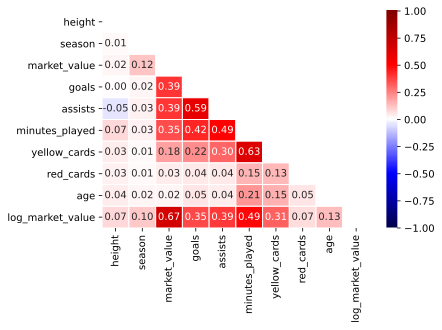

In [26]:
corr = data['all_eda'].corr()
_ = sns.heatmap(corr,  
    cmap = 'seismic', 
    linewidth = 1, linecolor = 'white',
    vmax = 1, vmin = -1,
    mask = np.triu(np.ones_like(corr, dtype = bool)), 
    annot = True,
    fmt = '0.2f'
)

In [27]:
#sns.pairplot(data['all'])

## Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

## Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

----

We will be using an OLS regression model and the evaluation techniques we are considering are RMSE and Euclidean distance.
A possible evaluation metric we will use is RMSE or Mean Absolute Value of Errors. It is derived by calculating the difference between the estimated and actual value, square those results, then calculate the mean of those results. The formula for RMSE is 

$$
    \text{RMSE} = \sqrt{\frac{\sum_{i = 1}^{N}\left(\text{Predicted}_{i} - \text{Actual}_{i}\right)^{2}}{N}}
$$

## Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



In [28]:
# feature selection
!{sys.executable} -m pip install --quiet patsy

import patsy
y, X = patsy.dmatrices("market_value ~ age +  goals + assists + minutes_played +yellow_cards +red_cards +height +age", data=data['all_eda'], return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
pred = fit.predict(X)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     2041.
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:57:29   Log-Likelihood:            -8.7464e+05
No. Observations:               50781   AIC:                         1.749e+06
Df Residuals:                   50773   BIC:                         1.749e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.938e+05   3.77e+05      0.514      0.607   -5.45e+05    9.33e+05
age            -7.077e+04   7609.677     -9.300      0.000   -8.57e+04   -5.59e+04
goals           2.389e+05   5556.790     42.994      0.000    2.28e+05     2.5e+05
assists         3.135e+05   8922.514     35.136      0.000    2.96e+05    3.31e+05
minutes_played   826.8657     22.786     36.288      0.000     782.205     871.526
yellow_cards   -6.638e+04   6910.754     -9.606      0.000   -7.99e+04   -5.28e+04
red_cards      -7.781e+04   6.05e+04     -1.287      0.198   -1.96e+05    4.07e+04
height          7851.4099   1846.711      4.252      0.000    4231.837    1.15e+04
==============================================================================
Omnibus:                    53530.739   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5620986.518
Skew:                           5.193   Prob(JB):                         0.00
Kurtosis:                      53.485   Cond. No.                     4.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
print((y))
print((pred))

np.sqrt(mean_squared_error((y),(pred)))

           market_value
player_id              
9800            90000.0
43084          360000.0
230826         360000.0
198087        1530000.0
110689          68000.0
...                 ...
364245         420000.0
364245        1102500.0
364245        5400000.0
575367         658250.0
575367         765000.0

[50781 rows x 1 columns]
player_id
9800     -5.312852e+05
43084    -4.060252e+05
230826    2.289005e+06
198087    5.058775e+06
110689    6.836034e+05
              ...     
364245    5.837390e+05
364245    6.375011e+06
364245    6.683061e+06
575367    9.031230e+05
575367    6.952160e+05
Length: 50781, dtype: float64


7309873.9471996445

In [30]:
data['all_eda']['log_market_value'] = np.log(data['all_eda']['market_value'])
y, X = patsy.dmatrices("log_market_value ~ age +  goals + assists + minutes_played +yellow_cards +red_cards +height +age ", data=data['all_eda'], return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
pred2 = fit.predict(X)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_market_value   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     2851.
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:57:30   Log-Likelihood:                -84685.
No. Observations:               50781   AIC:                         1.694e+05
Df Residuals:                   50773   BIC:                         1.695e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7302      0.066    177.262      0.000      11.600      11.860
age                0.0156      0.001     11.664      0.000       0.013       0.018
goals              0.0231      0.001     23.713      0.000       0.021       0.025
assists            0.0473      0.002     30.198      0.000       0.044       0.050
minutes_played     0.0003      4e-06     63.609      0.000       0.000       0.000
yellow_cards       0.0007      0.001      0.560      0.576      -0.002       0.003
red_cards          0.0093      0.011      0.880      0.379      -0.011       0.030
height             0.0047      0.000     14.436      0.000       0.004       0.005
==============================================================================
Omnibus:                      836.100   Durbin-Watson:                   0.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.667
Skew:                           0.271   Prob(JB):                    2.76e-173
Kurtosis:                       2.716   Cond. No.                     4.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print(np.exp(y))
print(np.exp(pred2))

np.sqrt(mean_squared_error((y),(pred2)))

           log_market_value
player_id                  
9800                90000.0
43084              360000.0
230826             360000.0
198087            1530000.0
110689              68000.0
...                     ...
364245             420000.0
364245            1102500.0
364245            5400000.0
575367             658250.0
575367             765000.0

[50781 rows x 1 columns]
player_id
9800      6.157680e+05
43084     4.928576e+05
230826    7.211031e+05
198087    1.931418e+06
110689    6.111676e+05
              ...     
364245    4.307993e+05
364245    2.970482e+06
364245    2.380843e+06
575367    4.402778e+05
575367    4.100153e+05
Length: 50781, dtype: float64


1.282369368429589

In [ ]:
y, X = patsy.dmatrices("log_market_value ~ age +  goals + assists + minutes_played +yellow_cards +red_cards +height +age + C(nationality)+ C(position)+ C(sub_position) +C(club_name)", data=data['all_eda'], return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
pred3 = fit.predict(X)
fit.summary()

In [ ]:
print(np.exp(y))
print(np.exp(pred3))

np.sqrt(mean_squared_error((y),(pred3)))

In [ ]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
y = data['all_eda']['log_market_value']
X = data['all_eda'][[
    'goals', 
    'assists', 
    'minutes_played', 
    'yellow_cards', 
    'red_cards', 
    'height',
    'age'
   # 'nationality',
   # 'position',
   # 'sub_position',
   # 'club_name'
]]

In [ ]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)


In [ ]:
y = data['all_eda']['market_value']
dataset = pd.get_dummies(data['all_eda'], columns = [
    'position', 
    'sub_position', 
    'nationality', 
    'club_name'
])

dataset = dataset.drop(columns = ['name','market_value'])
#dataset

X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size = .30, random_state = 70)
    
regr = skl.linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
#predicted2 = regr.predict(X_train[:1])

print(regr.score(X_train, Y_train))

print(regr.score(X_test, Y_test))

In [ ]:
sns.displot(data = data['all_eda'], x = 'market_value', bins = 50)

plt.show()

In [ ]:
df_highest_market_value_players = data['all_eda'].nlargest(n = 1, columns = 'market_value')

df_highest_market_value_players

In [ ]:
df_highest_market_value = data['all_eda'].loc[data['all_eda']['name'].isin(df_highest_market_value_players['name'])]

df_highest_market_value

In [ ]:
sns.barplot(data = df_highest_market_value, x = 'season', y = 'market_value')
plt.title('Player Market Value Over the Years')
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')

plt.show()

In [ ]:
y = data['all_eda']['market_value']
dataset = pd.get_dummies(data['all_eda'], columns = [
    'position', 
    'sub_position', 
    'nationality', 
    'club_name'
])

dataset = dataset.drop(columns = ['name','market_value'])
dataset

In [ ]:
# from sklearn import linear_model
# from sklearn.compose import ColumnTransformer
# from sklearn.datasets import fetch_openml
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
# from sklearn.model_selection import KFold

# '''
# regr = Pipeline(
#     #steps=[("preprocessor", preprocessor), ("model", Lasso())]
#     steps=[("preprocessor", preprocessor), ("model", gscv )]
# )
# gscv = GridSearchCV(regr, param_grid={'alpha': [0.01, 0.5, 1]}, cv=KFold(5))
# '''

# X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size = .30, random_state = 70)
    
# regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
# regr.fit(X_train, Y_train)

# predicted = regr.predict(X_test)
# #predicted2 = regr.predict(X_train[:1])

# print(regr.score(X_train, Y_train))



# print(regr.score(X_test, Y_test))


In [ ]:
# print(predicted)
# print(Y_test)


In [ ]:
# feature selection
X = data['all_eda'][[
    'goals', 
    'assists', 
    'minutes_played', 
    'yellow_cards', 
    'red_cards', 
    'height',
    'age',
    'season',
    'nationality',
    'position',
    'sub_position',
    'club_name'
]]
#log to standardize market values??
y = data['all_eda']['market_value']

In [ ]:

num_features = ['goals','assists','minutes_played', 'yellow_cards', 'red_cards', 'height','age']
num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)
categorical_features = ['nationality', 'position', 'sub_position', 'club_name']
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, categorical_features),
    ]
)


In [ ]:
clf = Pipeline(
    #steps=[("preprocessor", preprocessor), ("model", Lasso())]
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)
#gscv = GridSearchCV(clf, param_grid={'alpha': [0.01, 0.5, 1]}, cv=KFold(5))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(score)
print(y_pred[:5])
print(y_test[:5])

In [ ]:
# heat map
corr_matrix = data['all_eda'].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
_ = sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')

## Discussion

### Interpreting the result
OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations
Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy
Since our data is readily available to the public and conforms to the privacy policy of the sourcing website Transfermarkt, we believe our research will not be subject to immediate concerns with neither ethics nor data privacy. Variables include `name`/`pretty_name` (name), `country_of_birth`/`country_of_citizenship` (nationality), `date_of_birth` (age) might be potentially relevant but are in no way detrimental to the ethics of our research. However, we do believe that the result of our research, once obtained and made public, could have unintended consequences. We evaluate a player's performance solely based on historical data; this implies that there will be biases. It is reasonable to expect that those biases, if not addressed and handled properly, could cause permanent damage to a person’s career. For instance, if a reliable player’s record shows that the player is unreliable, then team recruiters would use that information to make an informed decision based on false information. To prevent the chance of this being a consequence, we will put a disclaimer regarding the features that were not used in the evaluation of a player’s value. If a problem such as this comes up, we will remove said player's data from the study and make an effort to find and use the accurate data for each player. 

### Conclusion
Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

## Footnotes

<sup><a name="assoc-football" href="#note-assoc-football">1</a></sup> Wikipedia contributors. (2022, April 24). *Association football.* Wikipedia. https://en.wikipedia.org/wiki/Association_football

<sup><a name="transfermarkt-value-how" href="#note-transfermarkt-value-how">2</a></sup> Biswas, B. (2021, July 16). Transfermarkt Market Value explained - How is it determined? *Transfermarkt.* https://www.transfermarkt.co.in/transfermarkt-market-value-explained-how-is-it-determined-/view/news/385100

<sup><a name="peeters" href="#note-peeters">3</a></sup> Peeters, T. (2018). Testing the Wisdom of Crowds in the field: Transfermarkt valuations and international soccer results. *International Journal of Forecasting*, 34(1), 17–29. https://doi.org/10.1016/j.ijforecast.2017.08.002

<sup><a name="ackermann-follert-etal" href="#note-ackermann-follert-etal">4</a></sup>
Ackermann, P., & Follert, F. (2018). *Einige bewertungstheoretische Anmerkungen zur Marktwertanalyse der Plattform transfermarkt.de.* doi:10.22028/D291-32113

<sup><a name="transfermarkt-de" href="#note-transfermarkt-de">5</a></sup> Transfermarkt. (2000, May). *Fußball-Transfers, Gerüchte, Marktwerte und News.* https://www.transfermarkt.de/

<sup><a name="man-utd" href="#note-man-utd">6</a></sup> Summerscales, R. (2022, February 7). Man Utd, Man City And PSG Have Each Spent Over $1Billion Net On Transfers In 10 Years. *Futbol on FanNation.* https://www.si.com/fannation/soccer/futbol/news/man-utd-city-and-psg-spend-over-1b-net-on-transfers-in-10-years

<sup><a name="cariboo" href="#note-cariboo">7</a></sup> *Football Data from Transfermarkt.* (2022, April 22). [Dataset]. https://www.kaggle.com/datasets/davidcariboo/player-scores